Importar Paquetes

In [2]:
pkg load image

In [ ]:
import numpy

# Localización de Bordes:
- La localización de bordes consiste en saber específicamente en que posición de la imagen se encuentra un borde en particular. Para esto utilizaremos la transformada de Hough.
      
# Transformada de Hough:
- Es una transformada que permite detectar figuras que son expresadas matemáticamente como *rectas*, circunferencias y elipses.

## Caso de Lineas Rectas
- En este caso, las lineas rectas se pueden expresar con la ecuación `y = mx + b`
- La idea principal es considerar las caracteristicas de una linea recta en términos de los parámetros (m,b)
- El problema de `y = mx + b` es que no puede localizar lineas verticales, Para eso utilizaremos una representación polar 
    - `y = -(cos(a)/sen(a))x + p/sen(a)`
    - donde p = distancia del origen a la recta y a = es el ángulo que hay entre p y el eje x
    
- Despejando p:
    - `p = x*cos(a) + y*sen(a)`
- Es posible asociar a cada recta un par (p,a) que es único para todo a que exista en [0, pi[, p existe en el dominio real

NOTA: El espacio (p,a) se denomina el espacio de Hough para el conjunto de rectas en 2 dimensiones

# Pasos de la Transformada de Hough
Sea A una imagen binaria donde, A(x,y){ 1 : si esta en el borde , 0: si no esta en el borde }
- Paso 1: Cargar una imagen I
- Paso 2: Detectar los borde de I y guardarlo en una imagen A (binaria)
- Paso 3: Para cada (x,y) que esté en el borde:
- Paso 4: -Para todos los posibles a en `[o,pi[`
- Paso 5: -- Calcular p para (x,y) y a
- Paso 6: -- Incrementar la posición (p,a) en la matriz de acumulación
- Paso 7: Buscar las posiciones con los mayores valores en el acumulador
- Paso 8: Devolver la recta cuyos valores son los mayores en el acumulador



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



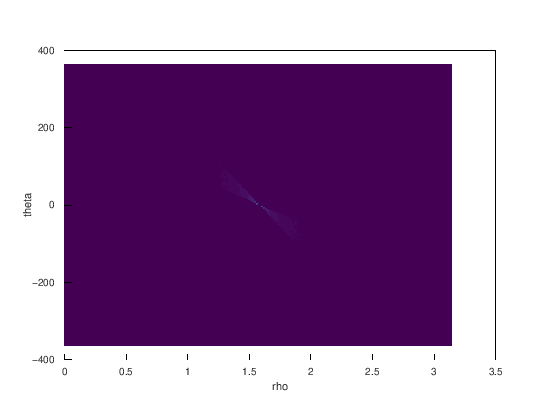

In [18]:
clc; clear; close all

A = imread('images/linea1.jpg');

%Convertir la imagen en binaria
B = im2double(A);
B(B<0.5) = 0;
B(B>=0.5) = 1;
# imshow(B)

%Calcular la discretización de theta y rho
%1. Discretización de Theta: Toma valores en [0,180] / [0,pi]
h1 = 1;
thetas = deg2rad(0:h1:180);

%2. Discretización de rho: Toma valores en [-d,d], donde d = sqrt(m^2 + n^2), y [m,n]=size(B)
[m,n] = size(B);
d = sqrt(m^2+n^2);
h2 =1;
rhos=-d:h2:d;

%Crear matriz de Acumulación
Acumulador = zeros(length(thetas), length(rhos));

%Llenar la matriz de acumulación
[x_borde,y_borde] = find(B);

for i =1: length(x_borde) %Recorrer los puntos del borde
    for theta_indice=1:length(thetas)
        theta = thetas(theta_indice)
        rho = x_borde(i)*cos(theta) + y_borde(i)*cos(theta)
        [~,rho_indice] = min(abs(rhos-rho));
        Acumulador(theta_indice,rho_indice) += 1;
    end
end

figure
surface(thetas, rhos, Acumulador', 'EdgeColor', 'none')
xlabel("rho")
ylabel('theta')